https://towardsdatascience.com/data-leakage-with-hyper-parameter-tuning-c57ba2006046

<img alt="" caption="how data leakage might happen" 
id="data_leakage" src="../images/data-leakage explanation.png" width="640" height="640">
image taken form [here](https://towardsdatascience.com/how-data-leakage-affects-machine-learning-models-in-practice-f448be6080d0)

# Sources of data leakage
### train data contains features that are not available in production
E.g.  

### future data somehow slipped into the training set
e.g. Giba's property:
<img alt="" caption="how data leakage might happen" 
id="data_leakage" src="../images/Giba_santander.png" width="640" height="640"><br>
[taken from kaggle](https://www.kaggle.com/c/santander-value-prediction-challenge/discussion/61329)<br>

and here is the mentioned data-structure:
<img alt="" caption="how data leakage might happen" 
id="data_leakage" src="../images/Gibas_data_structure.png" width="640" height="640"><br>
[this kernel exploits the leakage](https://www.kaggle.com/rebeccaysteboe/giba-s-property-extended-result)

### there is one feature that interacts with the target
<img alt="" caption="how data leakage might happen" 
id="data_leakage" src="../images/Distribution-of-malignant-black-and-benign-gray-candidates-depending-on-patient-ID-on.png" width="640" height="640"><br>
Distribution of malignant (black) and benign (gray) candidates depending on patient ID on the X-axis in log scale.<br>
taken from [Breast Cancer Identification: KDD CUP Winner’s Report](http://kdd.org/exploration_files/KDDCup08-P1.pdf)

Another example: Customer advisor has a long call with customer and finally sells the product that is shipped only two weeks later. Variables 'last advisory contact' and 'length of call' certainly anticipate the product sale.

### credit card applications
[example taken from here](https://www.kaggle.com/dansbecker/data-leakage)
 - card: Dummy variable, 1 if application for credit card accepted, 0 if not
 - reports: Number of major derogatory reports
 - age: Age n years plus twelfths of a year
 - income: Yearly income (divided by 10,000)
 - share: Ratio of monthly credit card expenditure to yearly income
 - expenditure: Average monthly credit card expenditure
 - owner: 1 if owns their home, 0 if rent
 - selfempl: 1 if self employed, 0 if not.
 - dependents: 1 + number of dependents
 - months: Months living at current address
 - majorcards: Number of major credit cards held
 - active: Number of active credit accounts


In [1]:
import pandas as pd
import pandas as pd
url = 'https://raw.githubusercontent.com/YoshiKitaguchi/Credit-card-verification-project/master/AER_credit_card_data.csv'
df = pd.read_csv(url, error_bad_lines=False, true_values = ['yes'], false_values = ['no'])
print(df.head())

   card  reports       age  income     share  expenditure  owner  selfemp  \
0  True        0  37.66667  4.5200  0.033270   124.983300   True    False   
1  True        0  33.25000  2.4200  0.005217     9.854167  False    False   
2  True        0  33.66667  4.5000  0.004156    15.000000   True    False   
3  True        0  30.50000  2.5400  0.065214   137.869200  False    False   
4  True        0  32.16667  9.7867  0.067051   546.503300   True    False   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5  


In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
import lightgbm

y = df['card']
X = df.drop('card', axis=1)

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,0,37.66667,4.5200,0.033270,124.983300,True,False,3,54,1,12
1,0,33.25000,2.4200,0.005217,9.854167,False,False,3,34,1,13
2,0,33.66667,4.5000,0.004156,15.000000,True,False,4,58,1,5
3,0,30.50000,2.5400,0.065214,137.869200,False,False,0,25,1,7
4,0,32.16667,9.7867,0.067051,546.503300,True,False,2,64,1,5


In [9]:
model = lightgbm.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=- 1, learning_rate=0.1, 
                                n_estimators=500, subsample_for_bin=20000, objective='binary', 
                                subsample=1.0, subsample_freq=0, colsample_bytree=1.0, 
                                n_jobs=- 1, silent=True, importance_type='split',
                                is_unbalance = False, scale_pos_weight = 1.0)
model_pipe = make_pipeline(model)
cv_scores = cross_val_score(model_pipe, X, y, scoring='accuracy')
print(np.mean(cv_scores))

0.9765065099665862


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

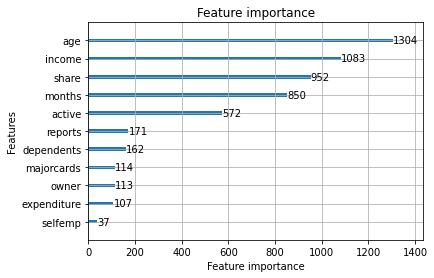

In [12]:
model.fit(X, y)
lightgbm.plot_importance(model)

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


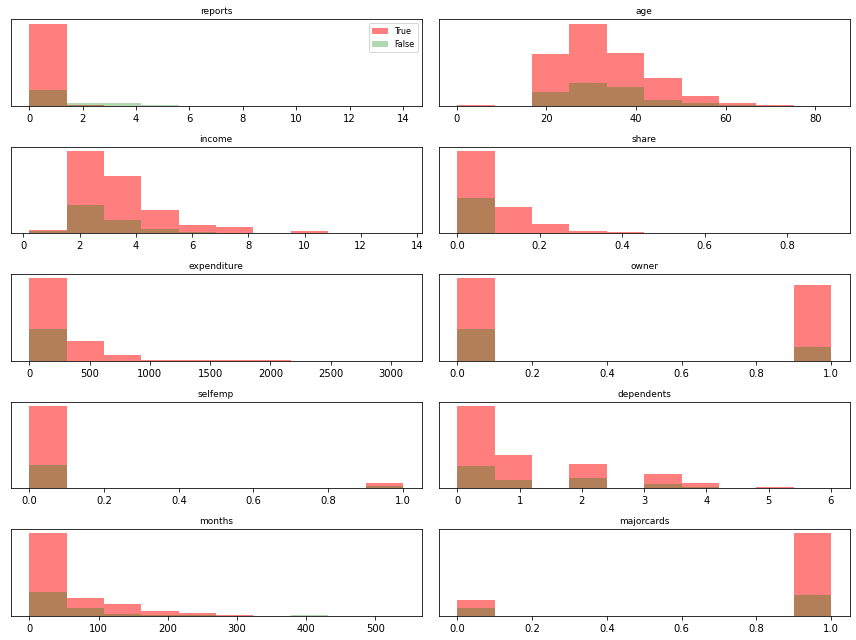

In [26]:
import matplotlib.pyplot as plt 
fig,axes =plt.subplots(5,2, figsize=(12, 9)) # 3 columns each containing 10 figures, total 30 features
# malignant=cancer.data[cancer.target==0] # define malignant
# benign=cancer.data[cancer.target==1] # define benign
ax=axes.ravel()# flat axes with numpy ravel
for i, col in enumerate(X.columns.tolist()[0:10]):
  _,bins=np.histogram(X[col])
  ax[i].hist(X.loc[y == True, col],bins=bins,color='r',alpha=.5)
  ax[i].hist(X.loc[y == False, col],bins=bins,color='g',alpha=0.3)
  ax[i].set_title(col, fontsize=9)
  ax[i].axes.get_xaxis().set_visible(True) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
  ax[i].set_yticks(())
ax[0].legend(['True','False'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
plt.show() 

In [23]:
display(X.loc[y == True, 'expenditure'].mean(), X.loc[y == False, 'expenditure'].mean())

238.60242068103616

0.0

In [25]:
display(X.loc[y == True, 'share'].mean(), X.loc[y == False, 'share'].mean())

0.08848152972453567

0.0004767954841216091

In [27]:
!pip install dtreeviz

     |████████████████████████████████| 60 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 280 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 1.7 MB/s eta 0:00:01
  Created wheel for dtreeviz: filename=dtreeviz-1.3-py3-none-any.whl size=66638 sha256=25409fd0299b4db84cc70d6b4d296db69fa2643d9284a927469e05495455398b
  Stored in directory: /home/martin/.cache/pip/wheels/9f/a6/a1/898c991294471015f13c1e5b456fb8134c1af835db4dd93a7a
Successfully built dtreeviz


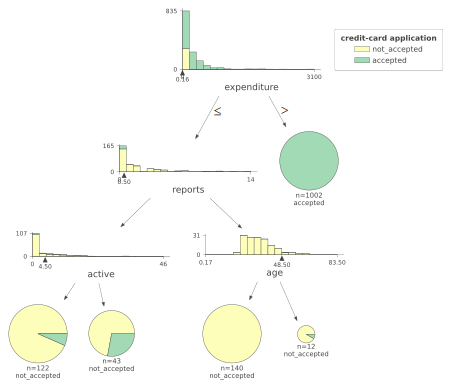

In [51]:
from sklearn import tree
from dtreeviz.trees import *
classifier = tree.DecisionTreeClassifier(max_depth=3)  # limit depth of tree
classifier.fit(X, y)

viz = dtreeviz(classifier, 
               X.values,
               y.values, 
               target_name='credit-card application',
               feature_names=X.columns.tolist(),
               class_names = ['not_accepted', 'accepted']
              )  
              
viz

# Dependency between data-samples

In [62]:
subsample_cc = pd.read_csv("../data/creditcard_subsampled.csv")
subsample_cc.head()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [64]:
pd.crosstab(subsample_cc.Class.astype(str) + "_true", pd.Series(np.zeros_like(subsample_cc.Class)).astype(str) + "_Actual")

col_0,0_Actual
Class,
0_true,100000
1_true,492


One strategy in these cases is oversampling of the minority class:

In [72]:
import imblearn
from imblearn.over_sampling import SMOTE
y_train = subsample_cc.Class
X_train = subsample_cc.drop('Class', axis = 1)
X_train_ov, y_train_ov = SMOTE(sampling_strategy=0.05).fit_resample(X_train, y_train)
pd.crosstab(y_train_ov.astype(str) + "_true", pd.Series(np.zeros_like(y_train_ov)).astype(str) + "_Actual")

col_0,0_Actual
Class,
0_true,100000
1_true,5000


In [76]:
from sklearn.metrics import f1_score, make_scorer
model = lightgbm.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=- 1, learning_rate=0.1, 
                                n_estimators=500, subsample_for_bin=20000, objective='binary', 
                                subsample=1.0, subsample_freq=0, colsample_bytree=1.0, 
                                n_jobs=- 1, silent=True, importance_type='split',
                                is_unbalance = False, scale_pos_weight = 1.0)
model_pipe = make_pipeline(model)
cv_scores = cross_val_score(model_pipe, X_train_ov, y_train_ov, scoring=make_scorer(f1_score, labels=[2]), cv = 2)
print(np.mean(cv_scores))

0.9845312083808839


In [77]:
cv_scores = cross_val_score(model_pipe, X_train_ov, y_train_ov, scoring=make_scorer(f1_score, labels=[2]), cv = 5)
print(np.mean(cv_scores))

0.9895718294472522


In [78]:
cv_scores = cross_val_score(model_pipe, X_train_ov, y_train_ov, scoring=make_scorer(f1_score, labels=[2]), cv = 10)
print(np.mean(cv_scores))

0.9912505482534396


In [79]:
cv_scores = cross_val_score(model_pipe, X_train_ov, y_train_ov, scoring=make_scorer(f1_score, labels=[2]), cv = 20)
print(np.mean(cv_scores))

0.9920846883292432


## the correct way to do it: oversample within each 

In [81]:
from imblearn.pipeline import Pipeline
ov_pipeline = Pipeline([
        ('sampling', SMOTE(sampling_strategy=0.05)),
        ('classification', model)
    ])
cv_scores = cross_val_score(ov_pipeline, X_train, y_train, scoring=make_scorer(f1_score, labels=[2]), cv=5)

In [82]:
print(np.mean(cv_scores))

0.7174623018088809


In [83]:
cv_scores = cross_val_score(ov_pipeline, X_train, y_train, scoring=make_scorer(f1_score, labels=[2]), cv=20)
print(np.mean(cv_scores))

0.8763042843798126


# Some more cases where we have dependent data
 - Repeatedly sampling data from the same individual:
     * Fraud: A fraudster commits many frauds that have a similiar pattern
     * customer journey: to detect an event as soon as possible data is sampled with different offset before the event
     * classifying websites: social media websites belong all to facebook
 - Train and test data is normalized with common sample statistics belonging to the whole data set
     * target encoding is dangerous: we will talk about it later on
     * stacking is dangerous: we will discuss this topic as well
 - Sentence Classification: sentences belonging to the same document
 - Diagnosis: patient records coming from the same hospital